<a href="https://colab.research.google.com/github/maeliech/BigDataPhysics/blob/main/StockPricesBGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Stock Prices

In [2]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Get a daily stock price or the return in yahoo/finance. (See Ref. 2)

Other tickers are: CAT, HYMC, JNJ

In [8]:
start_date = '2019-01-01'
end_date = '2023-01-01' 

ticker = 'AMZN'

datad = yf.download(ticker, start_date, end_date)
prices_o = datad['Open']
prices_o.tail()

[*********************100%***********************]  1 of 1 completed


Date
2022-12-23    83.250000
2022-12-27    84.970001
2022-12-28    82.800003
2022-12-29    82.870003
2022-12-30    83.120003
Name: Open, dtype: float64

2. Calculate and plot the autocorrelation for a stock.

[*********************100%***********************]  1 of 1 completed
1121.257789958083


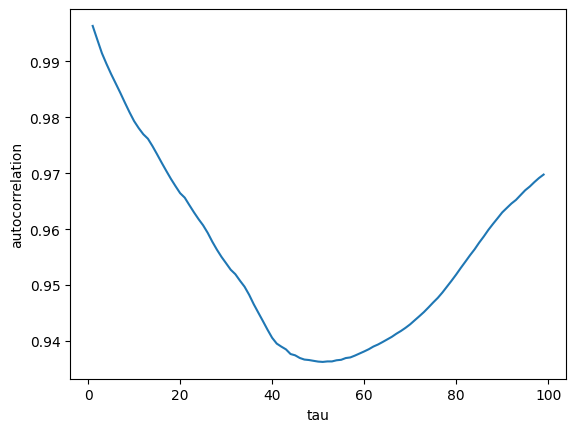

In [9]:
datad = datad = yf.download(ticker, '2020-01-01', '2023-01-01')
data = prices_o
mean = data.mean()
var = data.var()
print(var)
res = []

for tau in range(1,100):
  arr1 = data[:-tau] - mean
  arr2 = data[tau:] - mean
  auto = (arr1*arr2).mean()/var
  res.append([tau,auto])

res = np.array(res)
plt.plot(res[:,0],res[:,1])
plt.xlabel("tau") 
plt.ylabel("autocorrelation")
plt.show()

3. Get several stock prices. (See Refs)

In [11]:
prices = datad[['Open','Close']]
prices.tail()

,Open,Close
Date,,
2022-12-23,83.250000,85.250000
2022-12-27,84.970001,83.040001
2022-12-28,82.800003,81.820000
2022-12-29,82.870003,84.180000
2022-12-30,83.120003,84.000000


4. Calculate and plot Pearson correlation coefficients of the price or the return between two stocks

In [16]:
stock1 = yf.download('AMZN', '2020-01-01', '2022-01-01')
stock2 = yf.download('GLD', '2020-01-01', '2022-01-01')
stock1_o = stock1['Open']
stock2_o = stock2['Open']
print(np.corrcoef(stock1_o,stock2_o))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[[1.         0.71511812]
 [0.71511812 1.        ]]


Between the AMZN and the GLD stocks, we have the above correlation coefficient for their open prices.